## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
!pip install minisom

In [2]:
from minisom import MiniSom
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22.0,22.0,...,0.192154,2017,NaN,38.754263,-9.163397,23,HS,1,1545.0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21.0,20.0,...,0.098647,2015,NaN,38.777761,-9.156197,41,HS,0,10219.0,1
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9.0,310.0,...,0.497251,2008,NaN,38.785329,-9.127113,36,Phd.,1,1753.0,2
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12.0,499.0,...,0.206713,2010,NaN,38.744086,-9.156589,80,HS,1,11195.0,7
12829,Hilda Huerta,2000-01-31 11:43:00,0,0,0,2,82.0,22.0,21.0,9.0,...,0.200625,2015,NaN,38.756024,-9.162970,23,HS,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20.0,18.0,...,0.096366,2008,935162.0,38.734446,-9.171911,48,Phd.,1,9730.0,0
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15.0,267.0,...,0.118998,2014,NaN,38.767070,-9.144301,37,HS,0,2416.0,0
182,Richard Carter,2001-01-14 05:49:00,0,0,0,2,83.0,23.0,23.0,23.0,...,0.199432,2016,953891.0,38.728487,-9.164140,22,HS,0,1491.0,0


## 3. Data Scaling and Normalization

In [4]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,longitude,age,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,0,0,0,2,91.0,20.0,22.0,22.0,195.0,964.0,...,47.0,105.0,85.0,0.192154,2017,-9.163397,23,1,1545.0,0
19330,1,0,0,2,197.0,5958.0,21.0,20.0,1435.0,434.0,...,45.0,1964.0,85.0,0.098647,2015,-9.156197,41,0,10219.0,1
2272,1,1,0,20,397.0,20.0,9.0,310.0,379.0,222.0,...,46.0,5.0,408.0,0.497251,2008,-9.127113,36,1,1753.0,2
25288,3,4,1,2,5282.0,237.0,12.0,499.0,873.0,460.0,...,617.0,1078.0,1956.0,0.206713,2010,-9.156589,80,1,11195.0,7
12829,0,0,0,2,82.0,22.0,21.0,9.0,172.0,856.0,...,48.0,103.0,83.0,0.200625,2015,-9.162970,23,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0,0,1,2,209.0,5474.0,20.0,18.0,1435.0,521.0,...,57.0,1984.0,112.0,0.096366,2008,-9.171911,48,1,9730.0,0
26447,0,0,0,3,185.0,1066.0,15.0,267.0,276.0,287.0,...,50.0,197.0,22.0,0.118998,2014,-9.144301,37,0,2416.0,0
182,0,0,0,2,83.0,23.0,23.0,23.0,189.0,921.0,...,51.0,94.0,77.0,0.199432,2016,-9.164140,22,0,1491.0,0


In [5]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)

### DBSCAN

In [39]:
num_cust_info['dbscan_clustering'] = DBSCAN(
    eps=2, min_samples=400
    ).fit_predict(scaled_data)

In [40]:
num_cust_info['dbscan_clustering'].value_counts()

 0     2947
 10    2910
 11    2502
 2     2419
 8     2406
 4     2380
 5     2378
 1     2332
 3     2315
 6     2278
 7     2104
 9     2102
-1      927
Name: dbscan_clustering, dtype: int64

## 4. K-Means

In [6]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

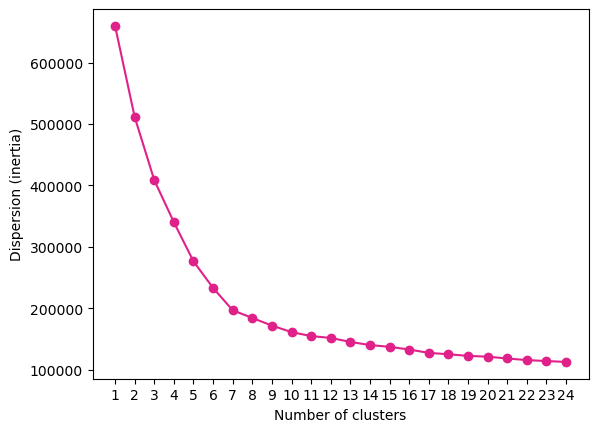

In [7]:
plt.plot(range(1, 25), dispersion, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [24]:
num_cust_info.groupby(['cluster_kmeans']).mean().T

cluster_kmeans,0,1,2,3,4,5,6
kids_home,0.975223,0.689588,0.997693,3.136761,0.247862,1.129358,0.000000
teens_home,0.092528,0.068547,0.271393,1.845077,0.177833,0.766640,0.000000
number_complaints,1.193380,0.500000,1.550545,0.934354,0.201711,0.330032,0.000000
distinct_stores_visited,19.100658,1.992625,7.995386,3.008972,2.420884,1.996434,1.000000
lifetime_spend_groceries,298.020906,200.406291,14984.949664,4997.646171,3155.204027,970.776545,2.701888
lifetime_spend_electronics,19.520325,4999.557484,199.983851,199.941575,627.341768,83.241680,1.149657
typical_hour,9.041038,20.951844,11.915268,17.394092,18.133464,9.747029,0.625775
lifetime_spend_vegetables,290.739257,20.033623,799.404992,602.111379,282.008197,1423.454635,2.124256
lifetime_spend_nonalcohol_drinks,290.921022,1500.946855,900.720218,901.078556,327.859943,37.085578,2.302029
lifetime_spend_alcohol_drinks,204.437863,499.866161,599.076971,500.893435,481.012830,34.526545,2.704794


In [25]:
num_cust_info.mean()

kids_home                                     1.146776
teens_home                                    0.512968
number_complaints                             0.764418
distinct_stores_visited                       6.121108
lifetime_spend_groceries                   3978.899334
lifetime_spend_electronics                  965.303071
typical_hour                                 14.357796
lifetime_spend_vegetables                   564.245311
lifetime_spend_nonalcohol_drinks            628.791908
lifetime_spend_alcohol_drinks               379.369654
lifetime_spend_meat                         513.912460
lifetime_spend_fish                         774.879925
lifetime_spend_hygiene                      162.835290
lifetime_spend_videogames                   536.869491
lifetime_total_distinct_products           1123.962169
percentage_of_products_bought_promotion       0.190981
year_first_transaction                     2008.683912
longitude                                    -9.157744
age       

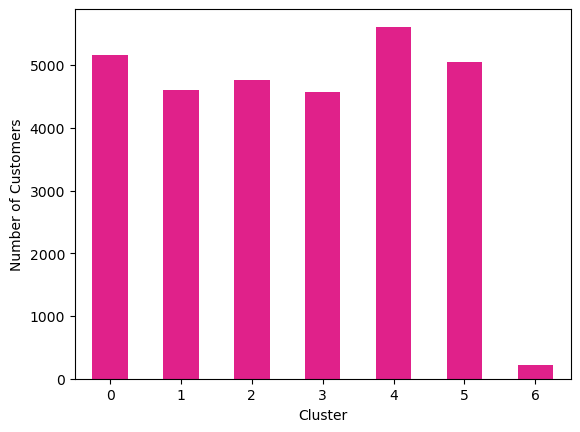

In [26]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()